In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-ranked-anime-dataset/toprankedanime.csv


# Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# Step 2: load dataset

In [3]:
df = pd.read_csv('/kaggle/input/top-ranked-anime-dataset/toprankedanime.csv')

In [4]:
df.head(5)

,name,type,episodes,status,aired,premiered,broadcast,producers,licensors,studios,source,genres,duration,rating,score,ranked,popularity,favorites
0,Sousou no Frieren,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,Fridays at 23:00 (JST),"['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...",['add some'],Madhouse,Manga,"['Adventure', 'Drama', 'Fantasy']",24 min. per ep.,PG-13 - Teens 13 or older,9.36,#1,#259,"43,524"
1,Steins;Gate,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),"['Frontier Works', 'Media Factory', 'Kadokawa ...",['Funimation'],White Fox,NaN,"['Drama', 'Sci-Fi', 'Suspense']",24 min. per ep.,PG-13 - Teens 13 or older,9.07,#3,#13,"189,803"
2,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",Bones,Manga,"['Action', 'Adventure', 'Drama', 'Fantasy']",24 min. per ep.,R - 17+ (violence & profanity),9.09,#2,#3,"226,283"
3,Gintama°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),"['TV Tokyo', 'Aniplex', 'Dentsu']","['Funimation', 'Crunchyroll']",Bandai Namco Pictures,Manga,"['Action', 'Comedy', 'Sci-Fi']",24 min. per ep.,PG-13 - Teens 13 or older,9.06,#4,#343,"16,685"
4,Shingeki no Kyojin Season 3 Part 2,TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,Mondays at 00:10 (JST),"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Wit Studio,Manga,"['Action', 'Drama', 'Suspense']",23 min. per ep.,R - 17+ (violence & profanity),9.05,#5,#21,"58,822"


In [5]:
df.tail()

,name,type,episodes,status,aired,premiered,broadcast,producers,licensors,studios,source,genres,duration,rating,score,ranked,popularity,favorites
2018,Chobits,TV,26,Finished Airing,"Apr 3, 2002 to Sep 25, 2002",Spring 2002,Wednesdays at 02:20 (JST),"['TBS', 'Pioneer LDC']","['Funimation', 'Geneon Entertainment USA']",Madhouse,Manga,"['Comedy', 'Drama', 'Romance', 'Sci-Fi', 'Ecchi']",24 min. per ep.,PG-13 - Teens 13 or older,7.4,#2249,#465,"4,004"
2019,Bokutachi no Remake,TV,12,Finished Airing,"Jul 3, 2021 to Sep 25, 2021",Summer 2021,Saturdays at 21:30 (JST),"['Studio Mausu', 'bilibili', 'Bushiroad Music'...",['add some'],feel.,Light novel,"['Drama', 'Romance']",25 min. per ep.,PG-13 - Teens 13 or older,7.4,#2248,#688,"2,394"
2020,Akazukin Chacha,TV,74,Finished Airing,"Jan 7, 1994 to Jun 30, 1995",Winter 1994,Fridays at 18:00 (JST),"['Nihon Ad Systems', 'Shueisha']",['add some'],Gallop,Manga,"['Adventure', 'Comedy', 'Fantasy', 'Romance']",24 min. per ep.,G - All Ages,7.4,#2247,#5270,132
2021,Yao Shen Ji 4th Season,ONA,52,Finished Airing,"Apr 8, 2020 to Sep 27, 2020",NaN,NaN,['bilibili'],['add some'],Ruo Hong Culture,NaN,"['Action', 'Adventure', 'Fantasy', 'Romance']",8 min. per ep.,PG-13 - Teens 13 or older,7.4,#2245,#7564,31
2022,Wu Geng Ji Zhi Tianqi,ONA,42,Finished Airing,"Dec 29, 2017 to Oct 5, 2018",NaN,NaN,['Tencent Penguin Pictures'],['add some'],Sparkly Key Animation Studio,Manga,"['Action', 'Fantasy', 'Supernatural']",16 min. per ep.,PG-13 - Teens 13 or older,7.4,#2244,#9574,10


# Step 3 : Exploring the Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        2023 non-null   object 
 1   type        2023 non-null   object 
 2   episodes    2023 non-null   object 
 3   status      2023 non-null   object 
 4   aired       2023 non-null   object 
 5   premiered   1035 non-null   object 
 6   broadcast   1035 non-null   object 
 7   producers   2023 non-null   object 
 8   licensors   2023 non-null   object 
 9   studios     2023 non-null   object 
 10  source      1365 non-null   object 
 11  genres      2023 non-null   object 
 12  duration    2023 non-null   object 
 13  rating      2022 non-null   object 
 14  score       2023 non-null   float64
 15  ranked      2023 non-null   object 
 16  popularity  2023 non-null   object 
 17  favorites   2023 non-null   object 
dtypes: float64(1), object(17)
memory usage: 284.6+ KB


In [7]:
df.columns

Index(['name', 'type', 'episodes', 'status', 'aired', 'premiered', 'broadcast',
       'producers', 'licensors', 'studios', 'source', 'genres', 'duration',
       'rating', 'score', 'ranked', 'popularity', 'favorites'],
      dtype='object')

In [8]:
df.describe()

,score
count,2023.000000
mean,7.848418
std,0.363651
min,7.400000
25%,7.550000
50%,7.750000
75%,8.080000
max,9.360000


In [9]:
df.isnull()

,name,type,episodes,status,aired,premiered,broadcast,producers,licensors,studios,source,genres,duration,rating,score,ranked,popularity,favorites
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2019,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2020,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

name            0
type            0
episodes        0
status          0
aired           0
premiered     988
broadcast     988
producers       0
licensors       0
studios         0
source        658
genres          0
duration        0
rating          1
score           0
ranked          0
popularity      0
favorites       0
dtype: int64

In [11]:
df[df.duplicated()]

,name,type,episodes,status,aired,premiered,broadcast,producers,licensors,studios,source,genres,duration,rating,score,ranked,popularity,favorites


In [12]:
df.shape

(2023, 18)

In [13]:
df.duplicated().sum()

0

In [14]:
type_counts = df['type'].value_counts()
type_counts

type
TV            1035
Movie          456
OVA            188
ONA            177
Special        119
TV Special      48
Name: count, dtype: int64

In [15]:
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
df = df.dropna(subset=['episodes'])

In [16]:
top_5_episodes = df.nlargest(5, 'episodes')
print("Top 5 anime with the highest number of episodes:")
top_5_episodes[['name', 'episodes']]

Top 5 anime with the highest number of episodes:


,name,episodes
839,Doraemon (1979),1787.0
272,Naruto: Shippuuden,500.0
1603,Wushen Zhuzai,496.0
941,Kochira Katsushikaku Kameari Kouenmae Hashutsujo,373.0
662,Bleach,366.0


In [17]:
type_counts = df['premiered'].value_counts()
top_counts = type_counts.head(5)
print("Top 5 premiering seasons with their counts:")
print(top_counts)

Top 5 premiering seasons with their counts:
premiered
Winter 2023    21
Fall 2022      20
Fall 2023      20
Fall 2012      18
Spring 2023    18
Name: count, dtype: int64


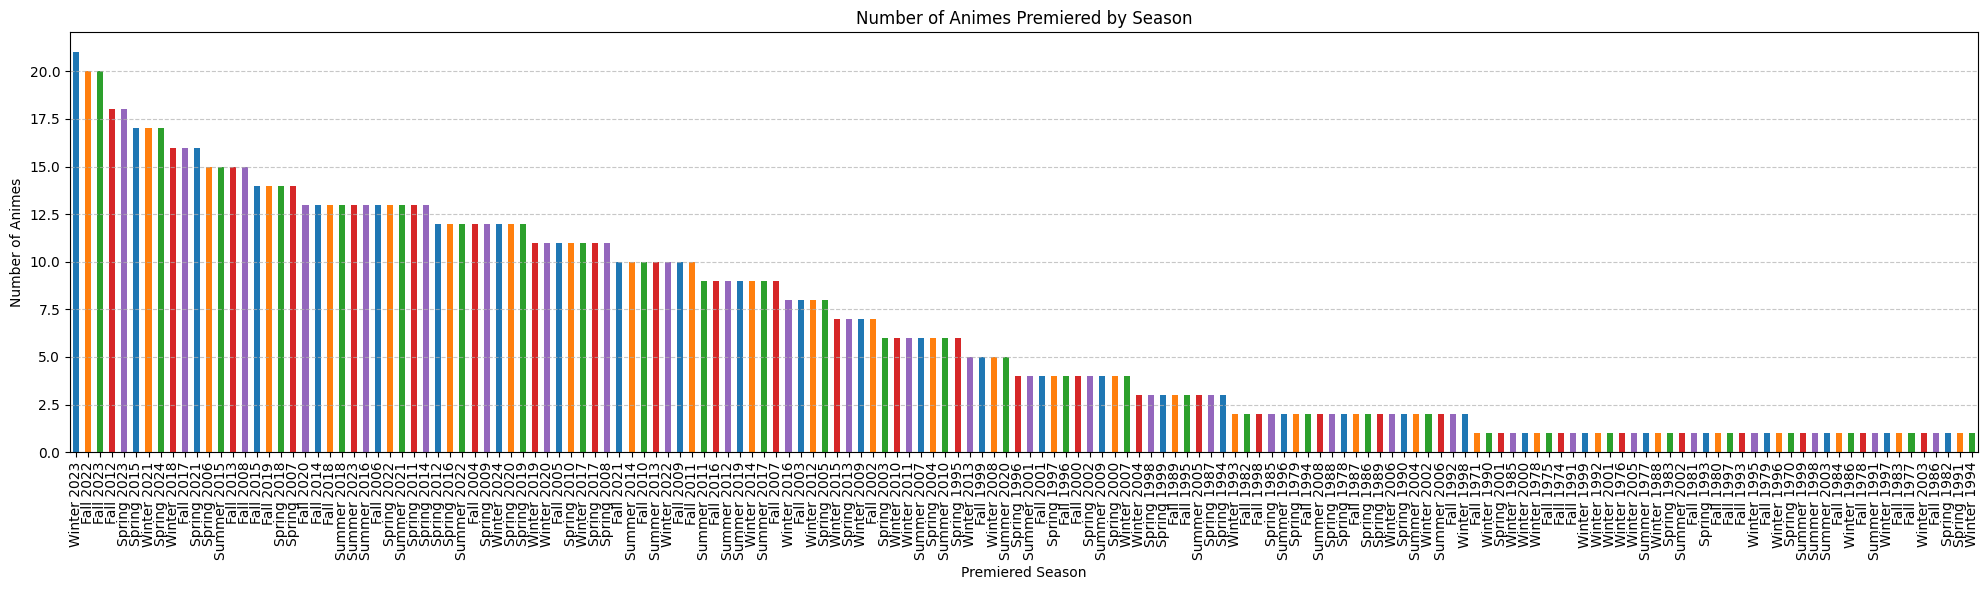

In [18]:
type_counts = df['premiered'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(20, 6))
type_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Number of Animes Premiered by Season')
plt.xlabel('Premiered Season')
plt.ylabel('Number of Animes')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
df_exploded = df.explode('genres')
genre_score = df_exploded.groupby('genres')['score'].max().sort_values()
genre_score

genres
['Comedy', 'Drama', 'Romance', 'Sci-Fi', 'Ecchi']         7.40
['Action', 'Fantasy', 'Girls Love']                       7.41
['Drama', 'Fantasy', 'Girls Love']                        7.42
['Action', 'Comedy', 'Fantasy', 'Romance', 'Ecchi']       7.42
['Adventure', 'Comedy', 'Drama', 'Gourmet', 'Romance']    7.42
                                                          ... 
['Action', 'Drama', 'Suspense']                           9.05
['Action', 'Comedy', 'Sci-Fi']                            9.06
['Drama', 'Sci-Fi', 'Suspense']                           9.07
['Action', 'Adventure', 'Drama', 'Fantasy']               9.09
['Adventure', 'Drama', 'Fantasy']                         9.36
Name: score, Length: 353, dtype: float64

In [20]:
df_exploded = df.explode('genres')
genre_score = df_exploded.groupby('genres')['score'].max().sort_values(ascending=False)
top_5_genres = genre_score.head(5)
top_5_genres


genres
['Adventure', 'Drama', 'Fantasy']              9.36
['Action', 'Adventure', 'Drama', 'Fantasy']    9.09
['Drama', 'Sci-Fi', 'Suspense']                9.07
['Action', 'Comedy', 'Sci-Fi']                 9.06
['Action', 'Drama', 'Suspense']                9.05
Name: score, dtype: float64

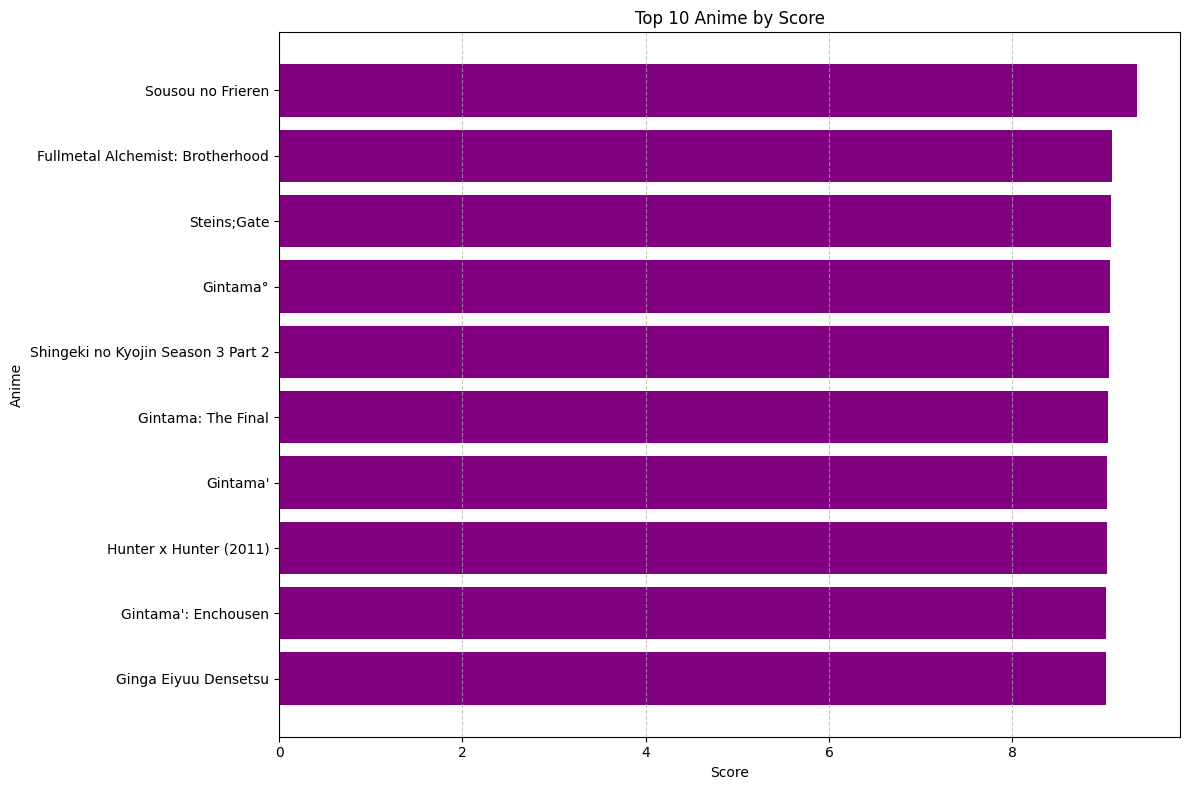

In [21]:
df_sorted = df.sort_values(by='score', ascending=False)

top_10 = df_sorted.head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_10['name'], top_10['score'], color='purple')
plt.title('Top 10 Anime by Score')
plt.xlabel('Score')
plt.ylabel('Anime')
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

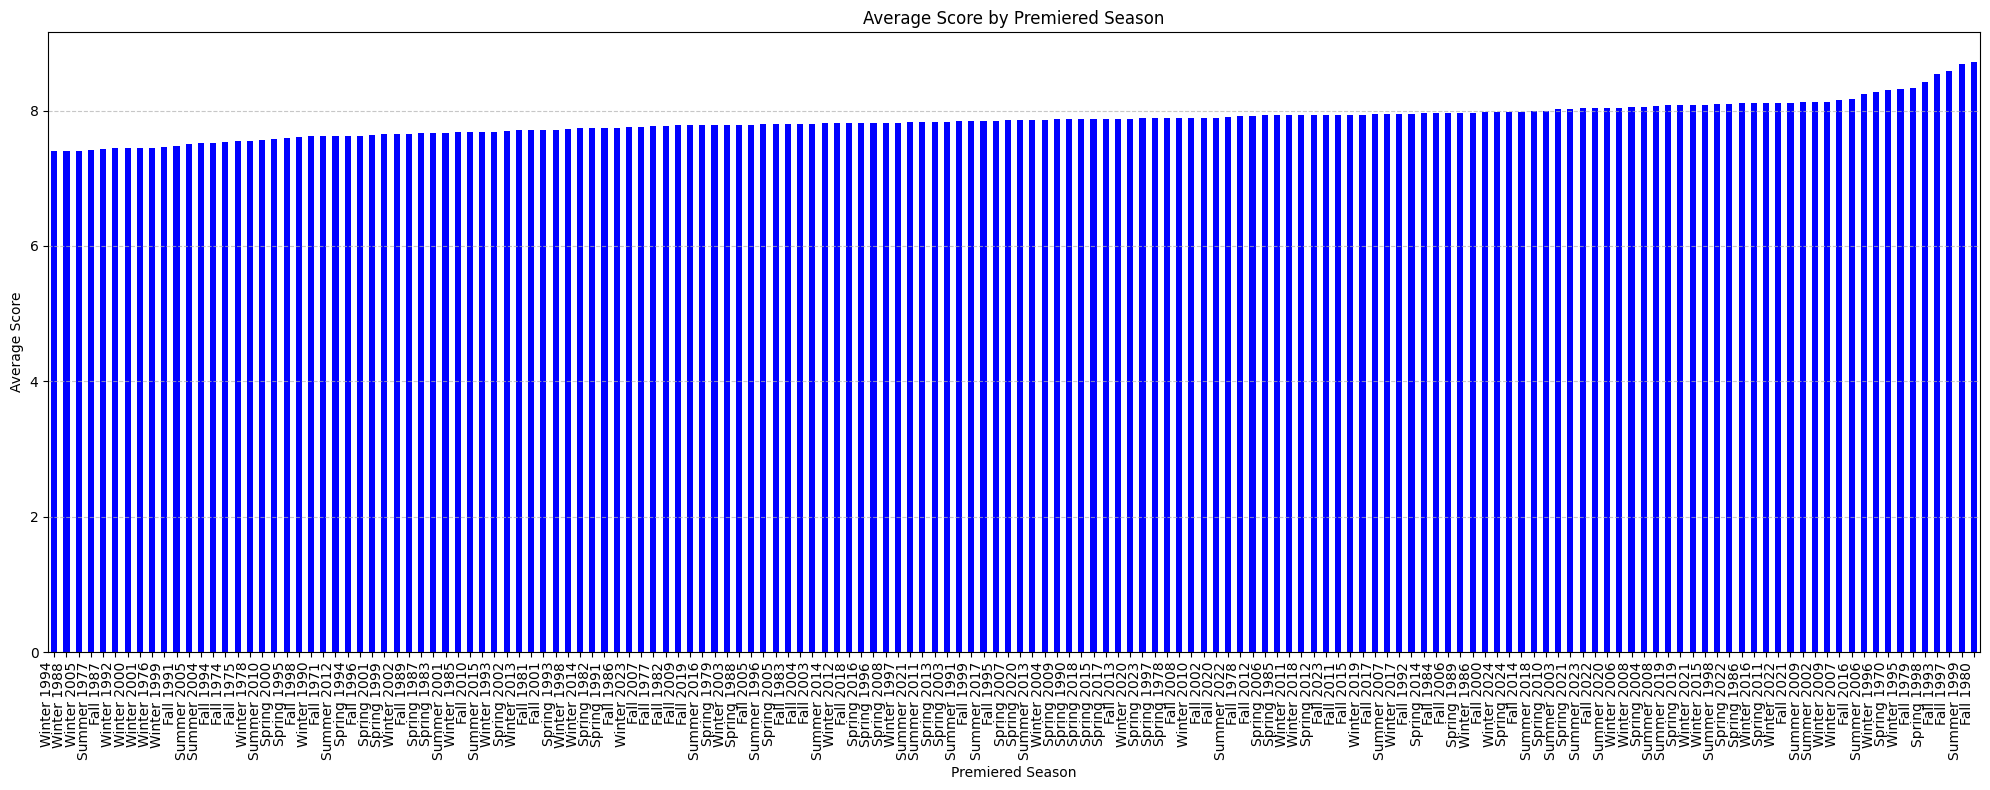

In [22]:
df = pd.DataFrame(df)
premiered_score = df.groupby('premiered')['score'].mean().sort_values()


plt.figure(figsize=(20, 8))
premiered_score.plot(kind='bar', color='blue')
plt.title('Average Score by Premiered Season')
plt.xlabel('Premiered Season')
plt.ylabel('Average Score')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()